In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

- IMPORTING DATASET

In [2]:
df=pd.read_csv("avacado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- THERE ARE NO NULL VALUES AS SEEN 

In [5]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- DROPPING THE Unnamed column


In [6]:
column_to_remove = 'Unnamed: 0'

In [7]:
# Remove column from dataset
df = df.drop(column_to_remove, axis=1)


In [8]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


- ENCODING THE DATA

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [10]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,111.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,72.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,33.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,160.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,151.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,112.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,73.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


- CHECKING FOR THE DISTRIBUTION

<AxesSubplot:xlabel='Date', ylabel='region'>

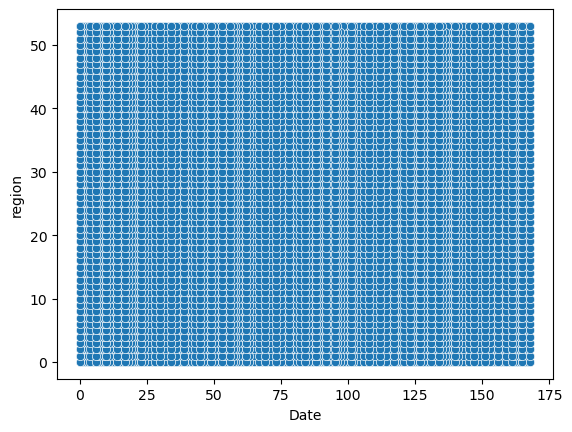

In [11]:
import seaborn as sns
sns.scatterplot(x="Date",y="region",data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

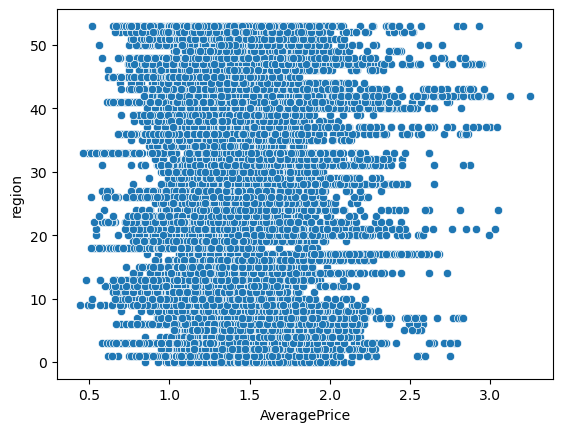

In [12]:
sns.scatterplot(x="AveragePrice",y="region",data=df)

<AxesSubplot:xlabel='Total Volume', ylabel='region'>

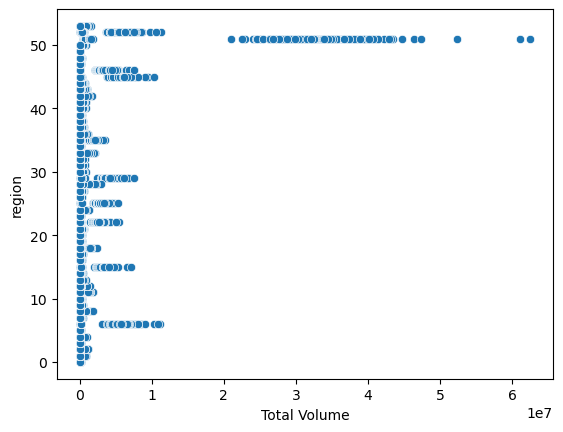

In [13]:
sns.scatterplot(x="Total Volume",y="region",data=df)

<AxesSubplot:xlabel='4046', ylabel='region'>

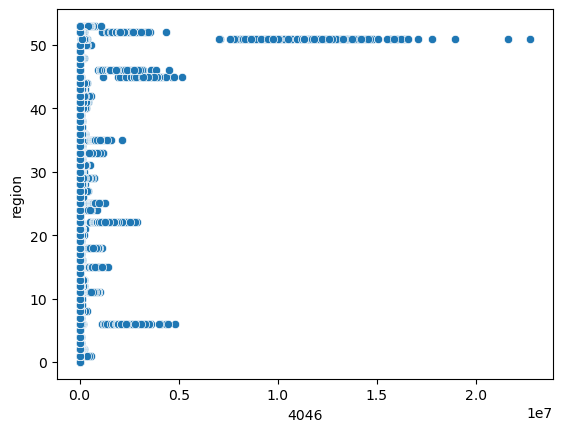

In [14]:
sns.scatterplot(x="4046",y="region",data=df)

<AxesSubplot:xlabel='4225', ylabel='region'>

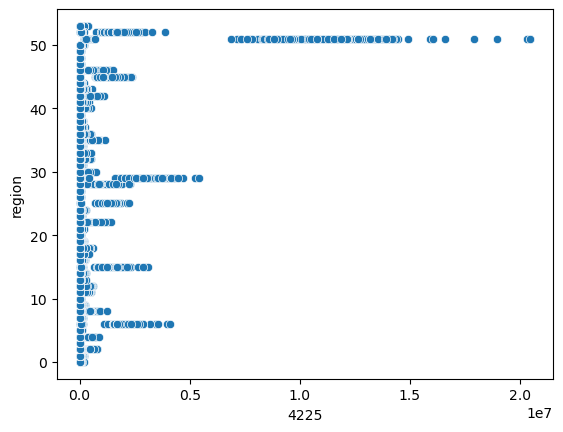

In [15]:
sns.scatterplot(x="4225",y="region",data=df)

<AxesSubplot:xlabel='4770', ylabel='region'>

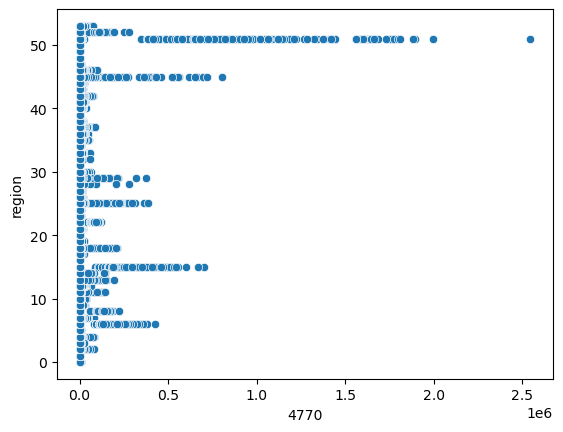

In [16]:
sns.scatterplot(x="4770",y="region",data=df)

<AxesSubplot:xlabel='Total Bags', ylabel='region'>

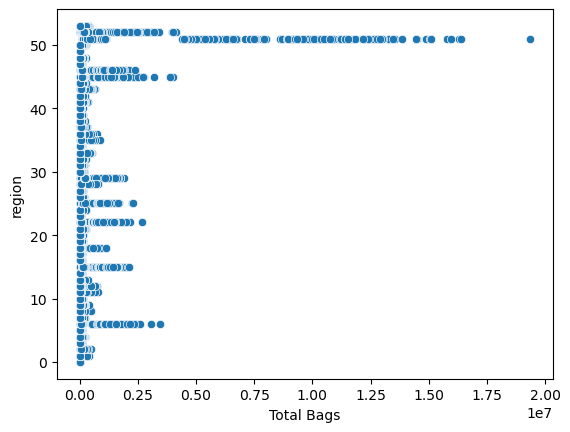

In [17]:
sns.scatterplot(x="Total Bags",y="region",data=df)

<AxesSubplot:xlabel='Small Bags', ylabel='region'>

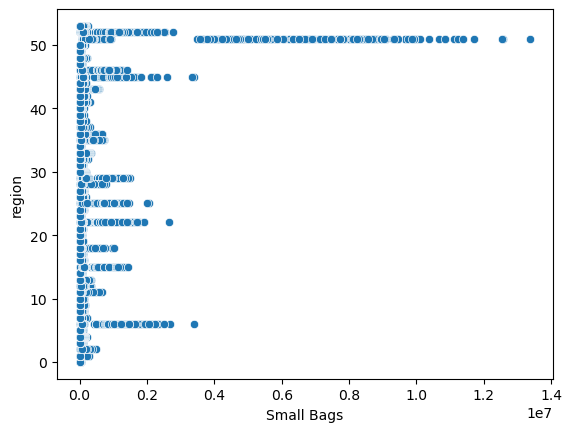

In [18]:
sns.scatterplot(x="Small Bags",y="region",data=df)

- MOST OF THEM HAVE UNEVEN DISTRIBUTION

# CHECKING FOR RELATIONSHIP AND MULTICOLINEARITY

<AxesSubplot:>

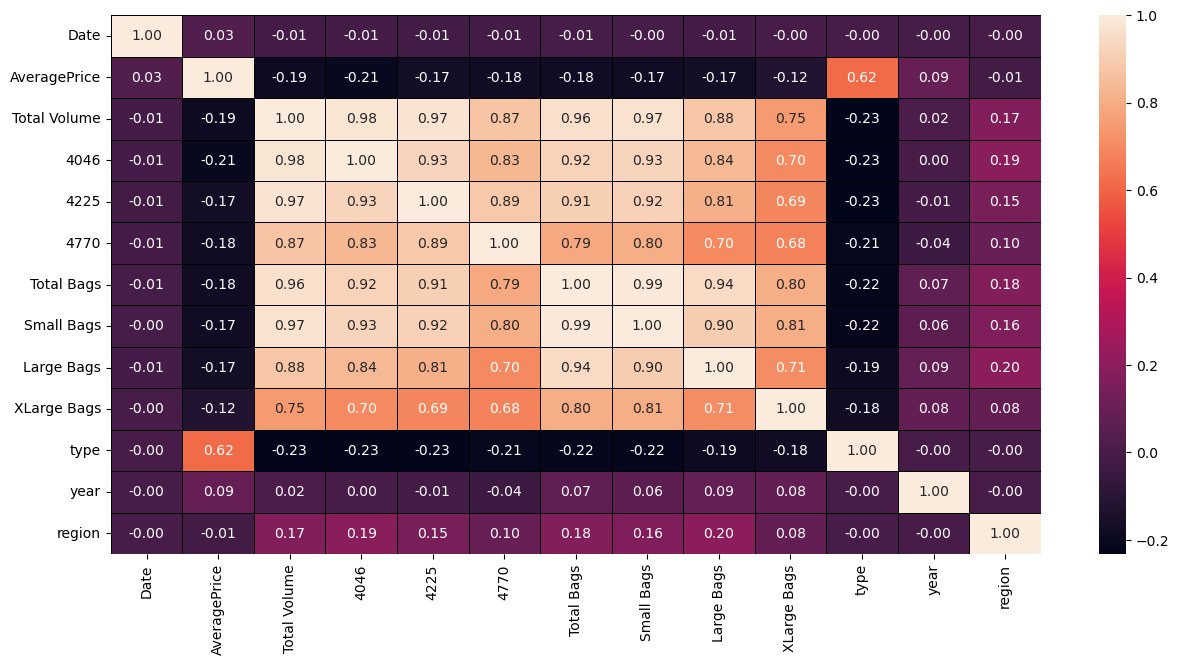

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

- TYPE AND AVERAGE PRICE IS HIGHLY CORRELATED 

# CHECKING FOR OUTLIERS

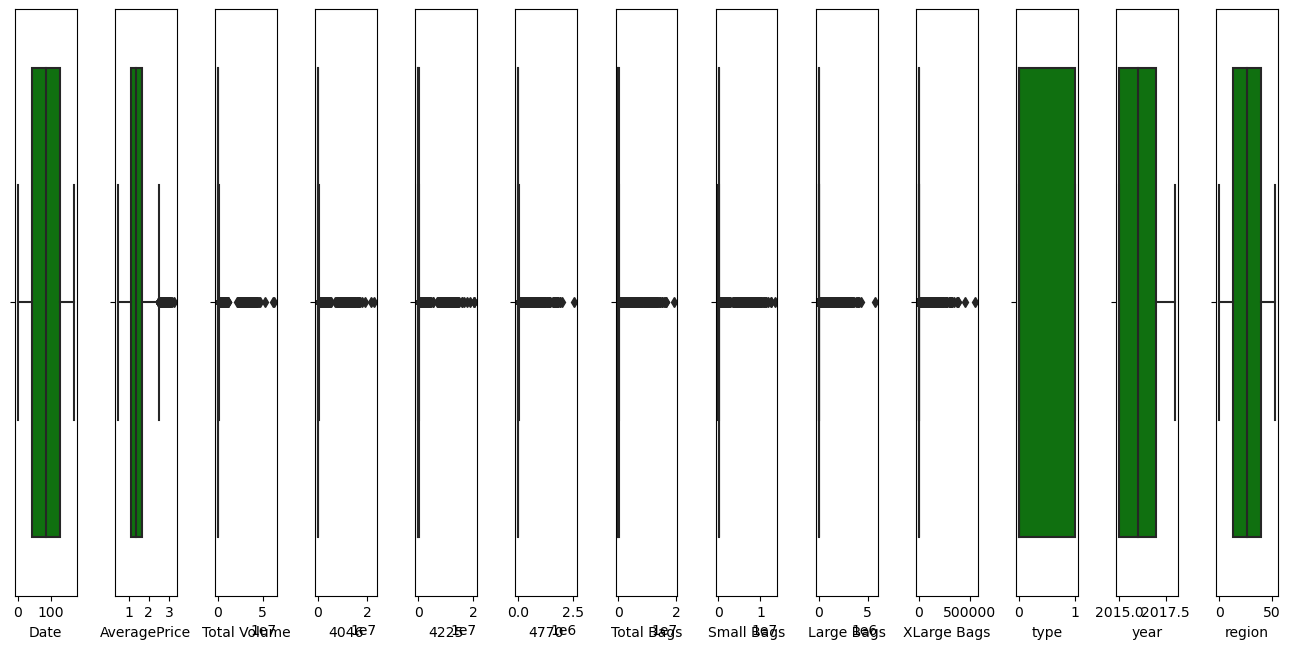

In [20]:
import warnings
warnings.filterwarnings('ignore')
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

# STARTING WITH CLASSIFICATION

In [21]:
x=df.drop('region',axis=1)
y=df['region']

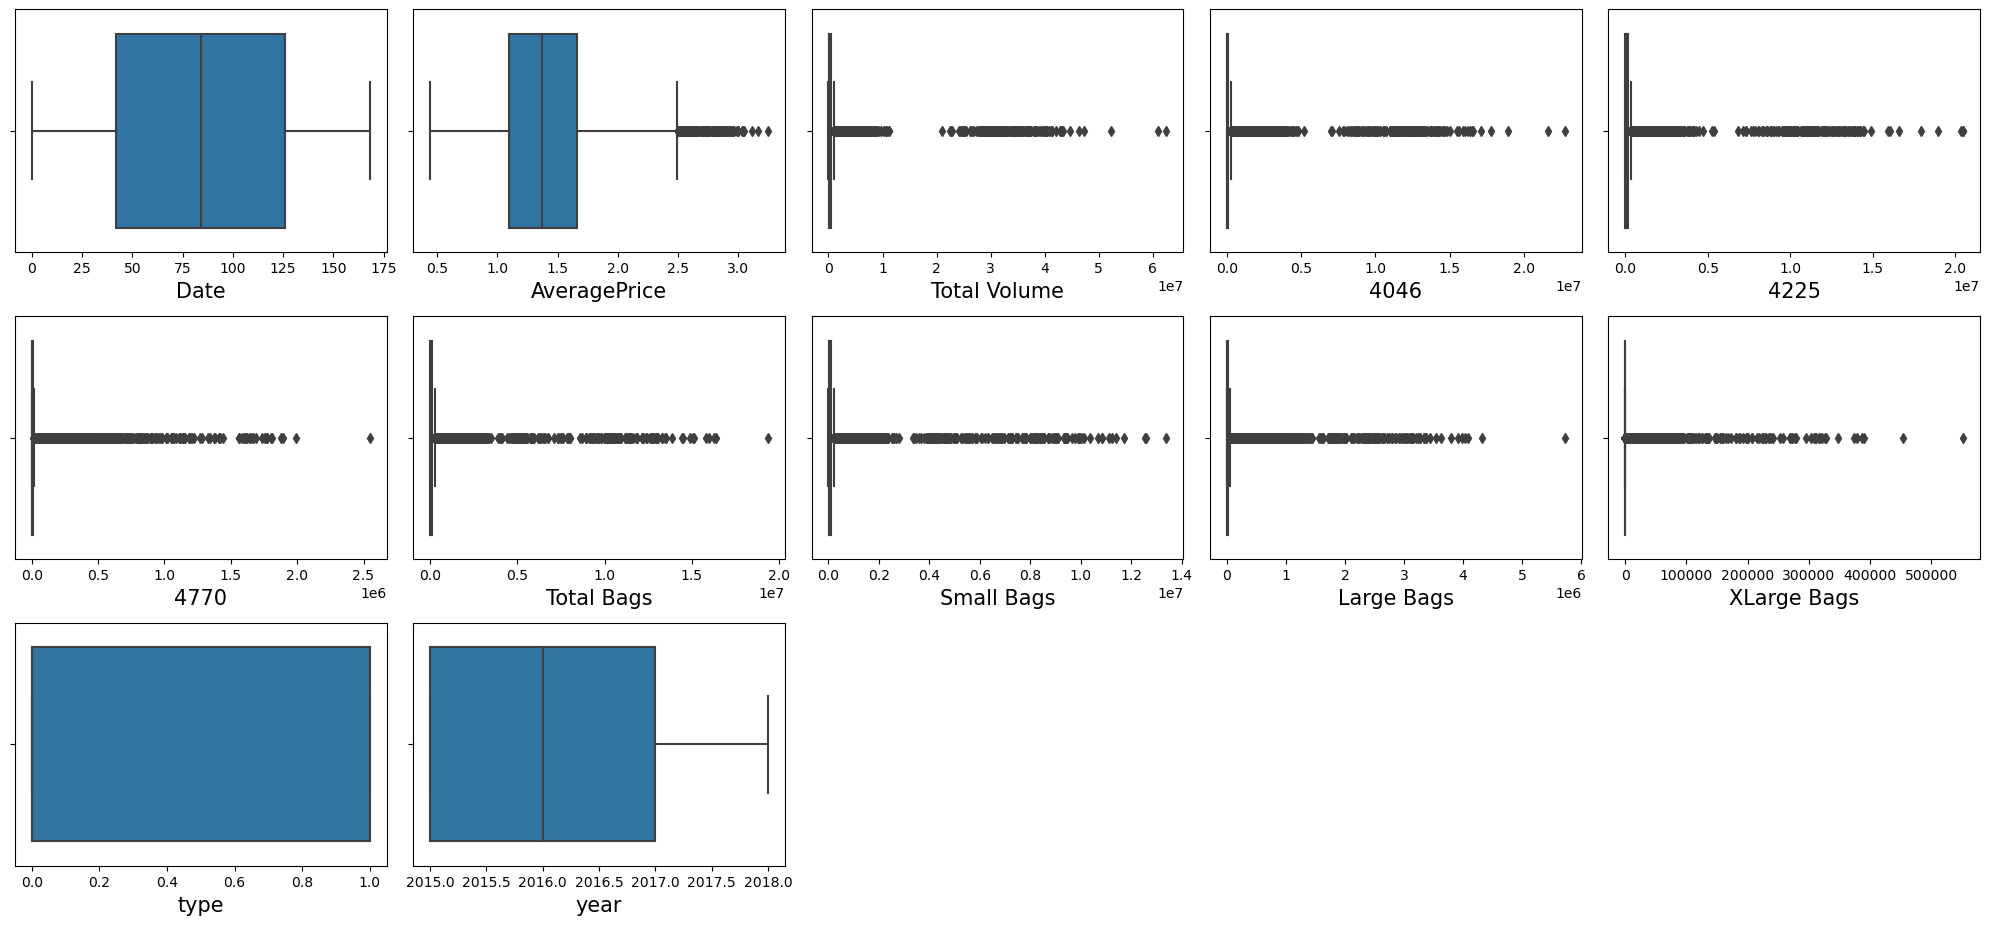

In [22]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=15)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

- most of the column consist of high number of outliers 

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [24]:
x_train.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
3177,110.0,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,42721.62,6021.29,0.0,0.0,2016
11344,12.0,1.55,29248.72,19043.11,10162.20,0.00,43.41,43.41,0.00,0.0,1.0,2015
5927,62.0,1.56,135286.70,1773.30,71050.71,110.87,62351.82,58032.13,4319.69,0.0,0.0,2017
13796,152.0,1.39,51756.47,5743.88,20482.80,6482.18,19047.61,8049.71,10997.90,0.0,1.0,2016
14030,155.0,2.23,6918.81,1196.98,5359.18,2.66,359.99,359.99,0.00,0.0,1.0,2016


In [25]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [26]:
numerical_data=x_train[['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']]

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(numerical_data)

In [28]:
scaled_num_df=pd.DataFrame(data=scaled_data,columns=numerical_data.columns,index=x_train.index)
scaled_num_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
3177,0.533904,0.411304,-0.208539,-0.198128,-0.224519,-0.084031,-0.193119,-0.186362,-0.197959,-0.173633,-0.994608,-0.159624
11344,-1.468521,0.361637,-0.239444,-0.217871,-0.240359,-0.219086,-0.241994,-0.242916,-0.222471,-0.173633,1.005422,-1.221660
5927,-0.446875,0.386470,-0.208633,-0.231509,-0.188910,-0.218010,-0.179461,-0.166074,-0.204886,-0.173633,-0.994608,0.902412
13796,1.392086,-0.035695,-0.232904,-0.228374,-0.231638,-0.156163,-0.222921,-0.232307,-0.177700,-0.173633,1.005422,-0.159624
14030,1.453385,2.050298,-0.245933,-0.231964,-0.244417,-0.219060,-0.241676,-0.242497,-0.222471,-0.173633,1.005422,-0.159624


In [29]:
x_train.drop(columns=scaled_num_df.columns,inplace=True)
x_train=pd.concat([scaled_num_df,x_train],axis=1)

In [30]:
x_train.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
3177,0.533904,0.411304,-0.208539,-0.198128,-0.224519,-0.084031,-0.193119,-0.186362,-0.197959,-0.173633,-0.994608,-0.159624
11344,-1.468521,0.361637,-0.239444,-0.217871,-0.240359,-0.219086,-0.241994,-0.242916,-0.222471,-0.173633,1.005422,-1.221660
5927,-0.446875,0.386470,-0.208633,-0.231509,-0.188910,-0.218010,-0.179461,-0.166074,-0.204886,-0.173633,-0.994608,0.902412
13796,1.392086,-0.035695,-0.232904,-0.228374,-0.231638,-0.156163,-0.222921,-0.232307,-0.177700,-0.173633,1.005422,-0.159624
14030,1.453385,2.050298,-0.245933,-0.231964,-0.244417,-0.219060,-0.241676,-0.242497,-0.222471,-0.173633,1.005422,-0.159624


- HERE I REDUCED THE OUTLIERS USING STANDARIZATION

In [31]:
df.skew()

Date             0.000042
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [32]:
features=['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']

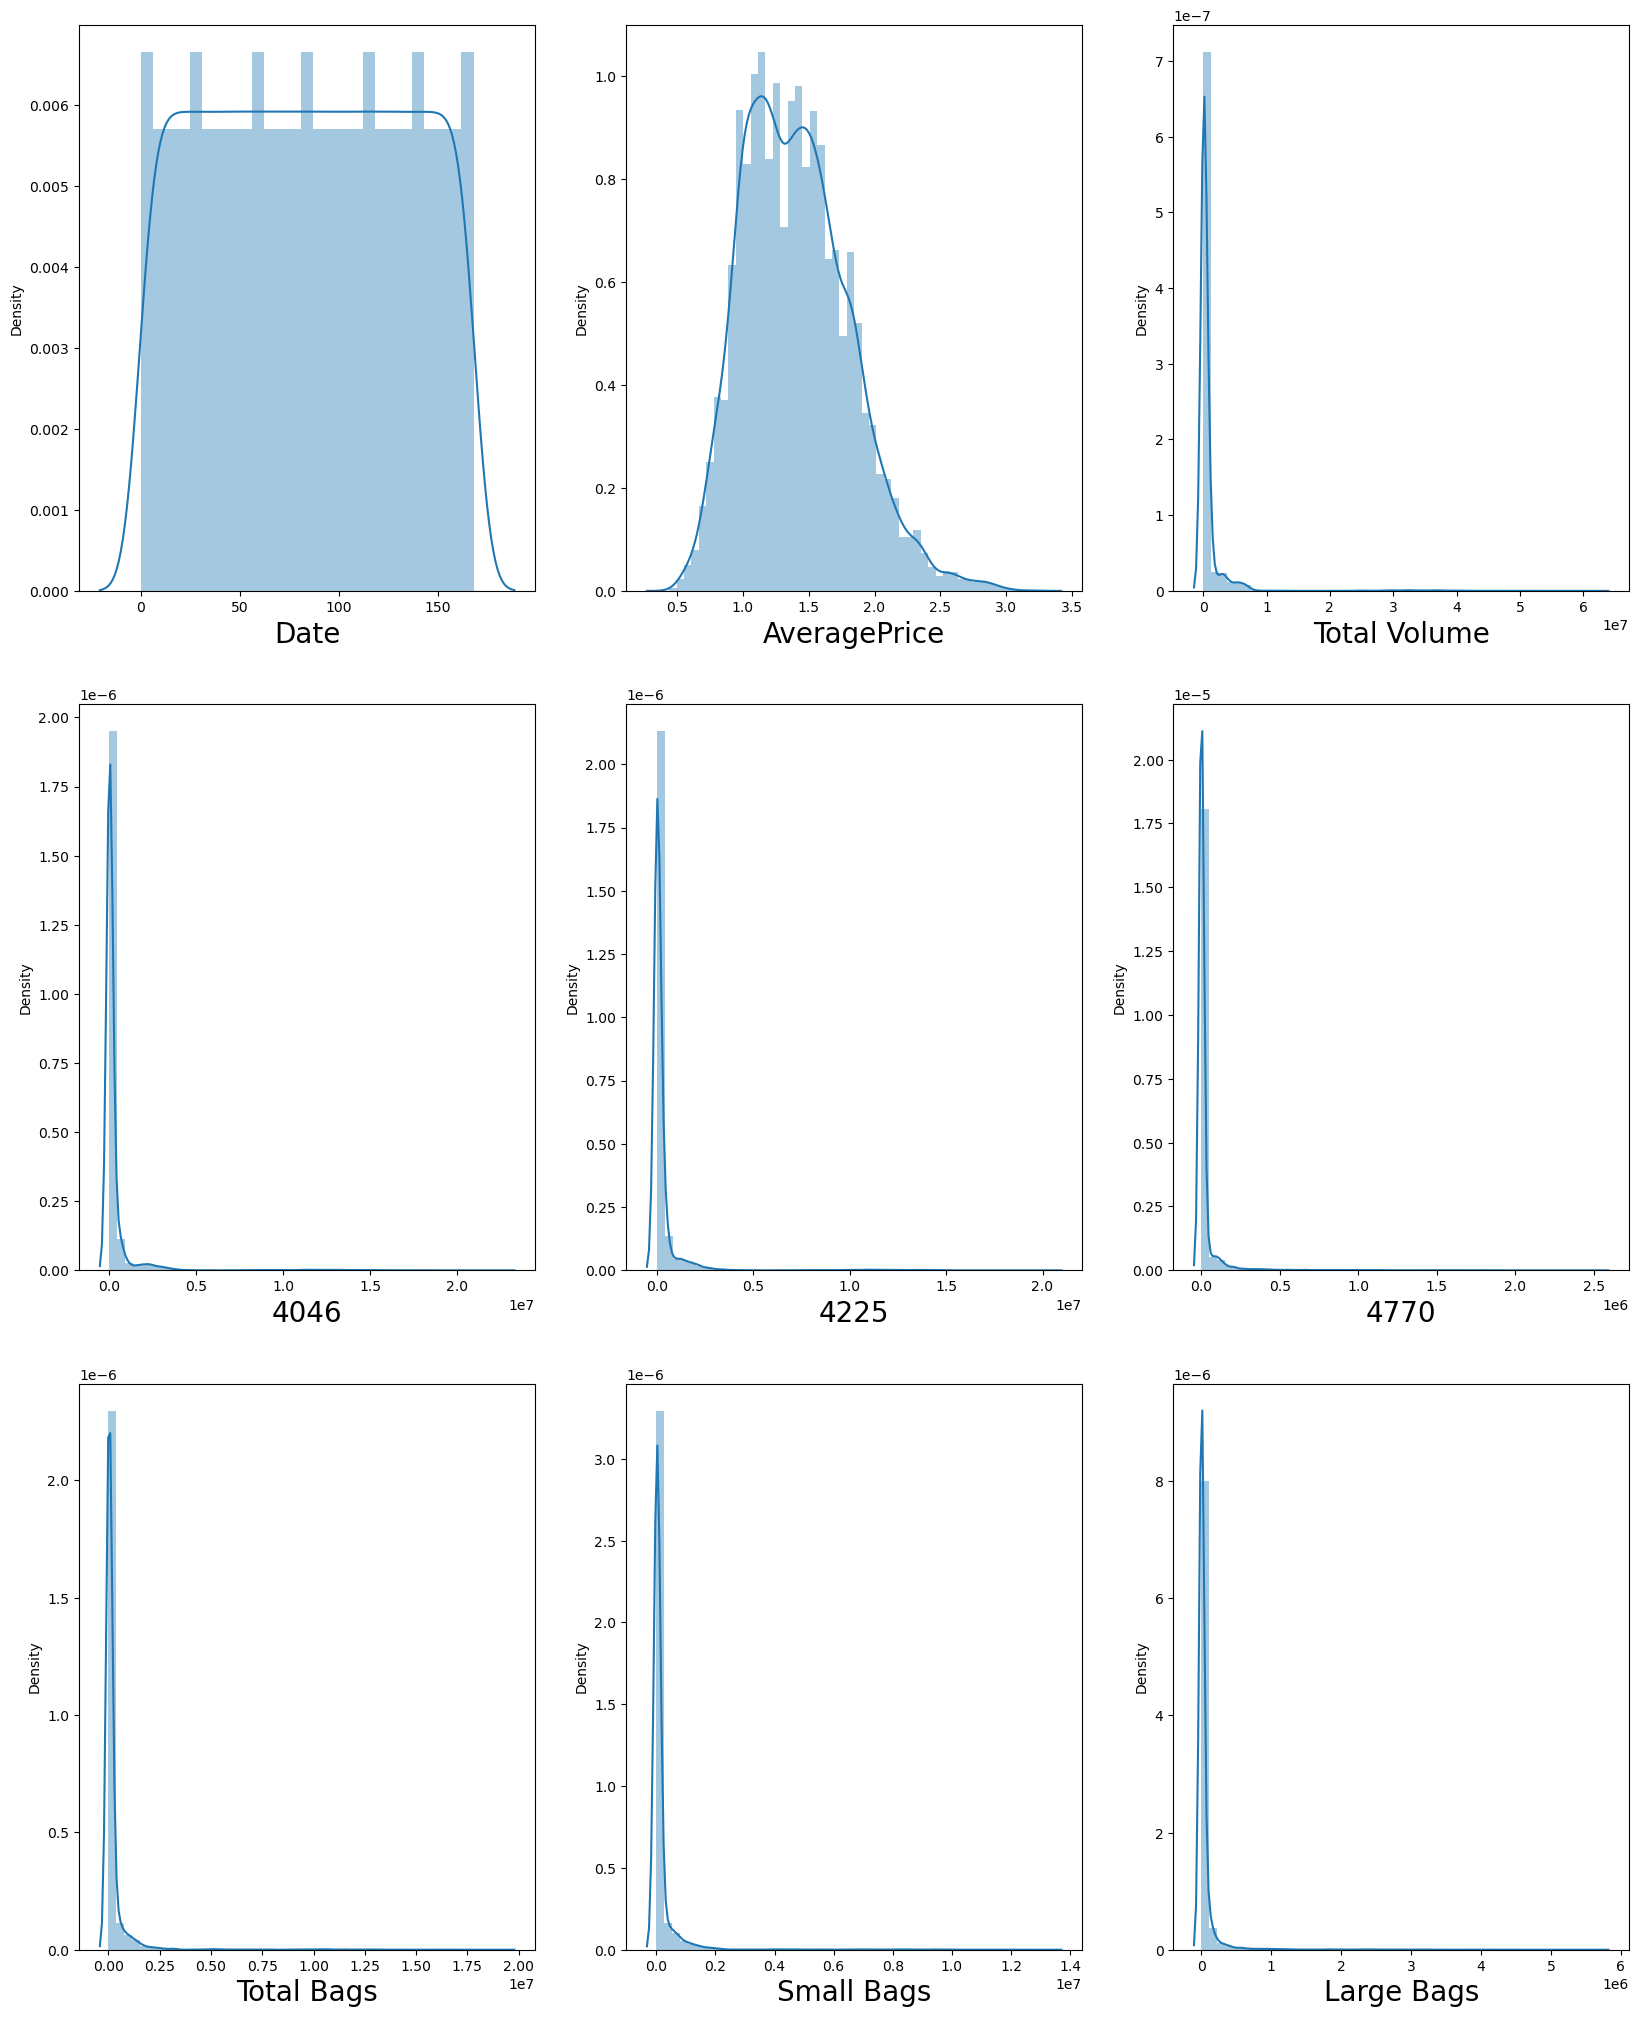

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df[features]:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [34]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box-cox' or 'yeo-johnson
'''

"\nparameters:\nmethod='box-cox' or 'yeo-johnson\n"

In [35]:
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,150.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015
1,111.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015
2,72.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015
3,33.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015
4,160.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018
18245,151.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018
18246,112.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018
18247,73.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018


In [36]:
df[features]=scaler.fit_transform(df[features].values)

In [37]:
df[features]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.262570,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895
1,0.597066,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895
2,-0.139798,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895
3,-1.006338,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895
4,1.424878,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-1.442074,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548
18245,1.278936,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548
18246,0.614883,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548
18247,-0.119678,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548


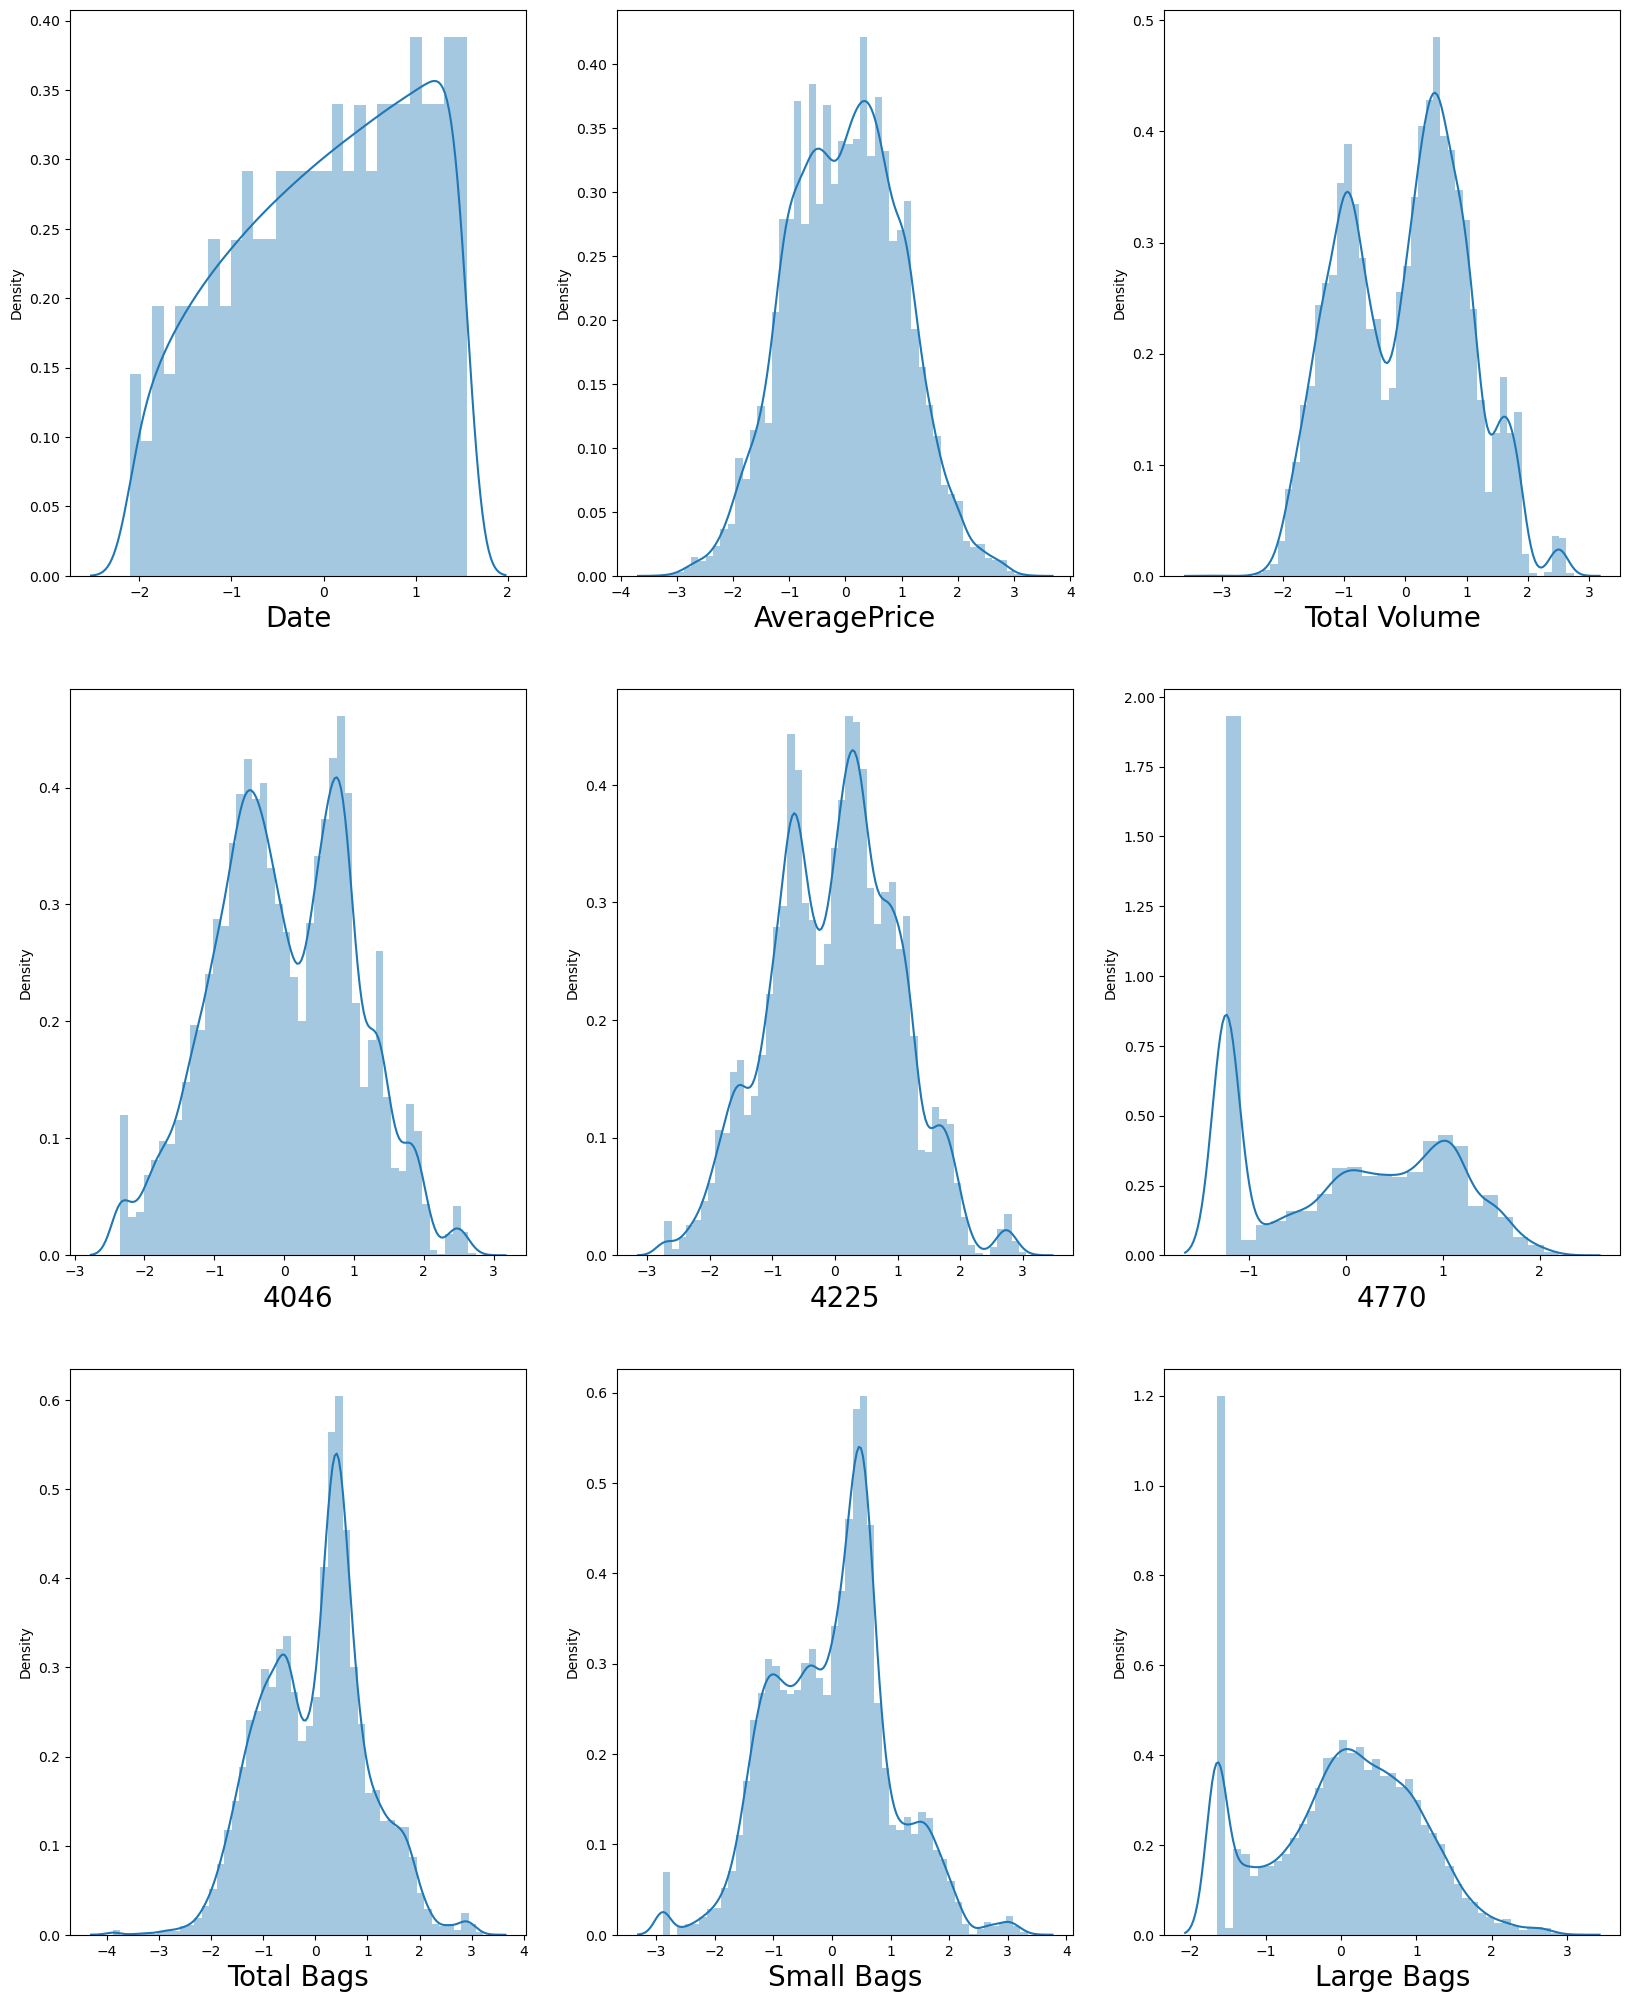

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df[features]:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [39]:
# skewness has been developed

# MODELING

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=987)

- TRYING TO INCREASE THE SCORE USING DIFERENT TECHNIQUES AND MODEL

- KNN MODEL

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn_model_train_acc=accuracy_score(y_train,knn_model.predict(x_train))
knn_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",knn_model_train_acc)
print("Test Accuracy:",knn_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.632783067333379
Test Accuracy: 0.5835616438356165
[[53  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  1 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 70  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  1  0 ...  0  0 29]]
              precision    recall  f1-score   support

         0.0       0.53      0.73      0.61        73
         1.0       0.63      0.51      0.56        53
         2.0       0.76      0.59      0.67        69
         3.0       0.66      0.72      0.69        64
         4.0       0.55      0.65      0.59        65
         5.0       0.60      0.40      0.48        62
         6.0       0.79      0.69      0.73        64
         7.0       0.62      0.70      0.66        71
         8.0       0.79      0.86      0.83        66
         9.0       0.66      0.70      0.67        82
        10.0       0.47      0.60      0.52        67
        11.0       0.57      0.60      0.59        77
        12.0       0.71      0.53      0.61        70
        13.0    

- THIS IS GIVING A BETTER SCORE

- DECISIONTREECLASSIFIER MODEL

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt_model_train_acc=accuracy_score(y_train,dt_model.predict(x_train))
dt_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",dt_model_train_acc)
print("Test Accuracy:",dt_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 1.0
Test Accuracy: 0.5835616438356165
[[53  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  1 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 70  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  1  0 ...  0  0 29]]
              precision    recall  f1-score   support

         0.0       0.53      0.73      0.61        73
         1.0       0.63      0.51      0.56        53
         2.0       0.76      0.59      0.67        69
         3.0       0.66      0.72      0.69        64
         4.0       0.55      0.65      0.59        65
         5.0       0.60      0.40      0.48        62
         6.0       0.79      0.69      0.73        64
         7.0       0.62      0.70      0.66        71
         8.0       0.79      0.86      0.83        66
         9.0       0.66      0.70      0.67        82
        10.0       0.47      0.60      0.52        67
        11.0       0.57      0.60      0.59        77
        12.0       0.71      0.53      0.61        70
        13.0       0.56      0

- DECISION TREE IS GIVING A POOR SCORE, TRYING TO INCREASE THE SCORE OF KNN WITH HYPER PARAMETER TUNNING

In [45]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(2,10,1)
}
grid_search=GridSearchCV(dt_model,grid_params,cv=5,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [46]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7136795064926532


In [47]:
dt_model=grid_search.best_estimator_
y_pred=knn_model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn_model_train_acc=accuracy_score(y_train,knn_model.predict(x_train))
knn_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",knn_model_train_acc)
print("Test Accuracy:",knn_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.632783067333379
Test Accuracy: 0.5835616438356165
[[53  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  1 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 70  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  1  0 ...  0  0 29]]
              precision    recall  f1-score   support

         0.0       0.53      0.73      0.61        73
         1.0       0.63      0.51      0.56        53
         2.0       0.76      0.59      0.67        69
         3.0       0.66      0.72      0.69        64
         4.0       0.55      0.65      0.59        65
         5.0       0.60      0.40      0.48        62
         6.0       0.79      0.69      0.73        64
         7.0       0.62      0.70      0.66        71
         8.0       0.79      0.86      0.83        66
         9.0       0.66      0.70      0.67        82
        10.0       0.47      0.60      0.52        67
        11.0       0.57      0.60      0.59        77
        12.0       0.71      0.53      0.61        70
        13.0    

- RANDOM FOREST CLASSIFIER

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(criterion='entropy',max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=14)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_model_train_acc=accuracy_score(y_train,rf_model.predict(x_train))
rf_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",rf_model_train_acc)
print("Test Accuracy:",rf_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.995753133776286
Test Accuracy: 0.8846575342465753
[[67  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 74  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  2 ...  0  0 49]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        73
         1.0       0.79      0.79      0.79        53
         2.0       0.93      0.96      0.94        69
         3.0       0.91      0.92      0.91        64
         4.0       0.93      0.95      0.94        65
         5.0       0.83      0.81      0.82        62
         6.0       0.98      1.00      0.99        64
         7.0       0.88      0.92      0.90        71
         8.0       0.97      0.97      0.97        66
         9.0       0.93      0.95      0.94        82
        10.0       0.72      0.85      0.78        67
        11.0       0.90      0.92      0.91        77
        12.0       0.89      0.96      0.92        70
        13.0    

- RANDOM FOREST IS PERFORMING WELL 

In [51]:
dt_model=grid_search.best_estimator_
y_pred=rf_model.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_model_train_acc=accuracy_score(y_train,rf_model.predict(x_train))
rf_model_test_acc=accuracy_score(y_test,y_pred)

print("Training Accuracy:",rf_model_train_acc)
print("Test Accuracy:",rf_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy: 0.995753133776286
Test Accuracy: 0.8846575342465753
[[67  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 74  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  2 ...  0  0 49]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        73
         1.0       0.79      0.79      0.79        53
         2.0       0.93      0.96      0.94        69
         3.0       0.91      0.92      0.91        64
         4.0       0.93      0.95      0.94        65
         5.0       0.83      0.81      0.82        62
         6.0       0.98      1.00      0.99        64
         7.0       0.88      0.92      0.90        71
         8.0       0.97      0.97      0.97        66
         9.0       0.93      0.95      0.94        82
        10.0       0.72      0.85      0.78        67
        11.0       0.90      0.92      0.91        77
        12.0       0.89      0.96      0.92        70
        13.0    

- tried hyperparameter tunning on randomforest , its giving the best result

# STARTING WITH REGRESSION MODEL

In [54]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.262570,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,0.0
1,0.597066,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,0.0
2,-0.139798,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,0.0
3,-1.006338,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,0.0
4,1.424878,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-1.442074,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,53.0
18245,1.278936,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,53.0
18246,0.614883,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,53.0
18247,-0.119678,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,53.0


In [65]:
column_to_remove = 'Date'

In [61]:
df = df.drop(column_to_remove, axis=1)


In [62]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [64]:
y

0       -0.086248
1       -0.034022
2       -1.273938
3       -0.793421
4       -0.219440
           ...   
18244    0.640729
18245    0.816307
18246    1.147790
18247    1.265876
18248    0.618287
Name: AveragePrice, Length: 18249, dtype: float64

In [63]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,0.0
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,0.0
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,0.0
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,0.0
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,53.0
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,53.0
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,53.0
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,53.0


In [66]:
from sklearn.preprocessing import MinMaxScaler
nms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

In [67]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")

at random state 0, the training accuracy is:- 0.5353512004712846
at random state 0, the testing accuracy is:- 0.533940658447354
at random state 1, the training accuracy is:- 0.5335112724889757
at random state 1, the testing accuracy is:- 0.5420101268666715
at random state 2, the training accuracy is:- 0.5376187926661805
at random state 2, the testing accuracy is:- 0.5252108755179277
at random state 3, the training accuracy is:- 0.5335459697248153
at random state 3, the testing accuracy is:- 0.5421620471359417
at random state 4, the training accuracy is:- 0.5389086741852372
at random state 4, the testing accuracy is:- 0.5202646577707706
at random state 5, the training accuracy is:- 0.5360935063693398
at random state 5, the testing accuracy is:- 0.5304873150451217
at random state 6, the training accuracy is:- 0.5337079230614881
at random state 6, the testing accuracy is:- 0.54100864447962
at random state 7, the training accuracy is:- 0.5370621173722497
at random state 7, the testing accu

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
pred_test=lr.predict(x_test)

In [71]:
print(r2_score(y_test,pred_test))

0.5344118814604456


In [72]:
from sklearn.model_selection import cross_val_score
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

at cross fold 2 the cv score is  -1.3110416101255837 and accuracy score for training is -0.5478411851881617 and accuracy for the testing is 0.5344118814604456


at cross fold 3 the cv score is  0.162754999791224 and accuracy score for training is -0.5478411851881617 and accuracy for the testing is 0.5344118814604456


at cross fold 4 the cv score is  0.10598122408591026 and accuracy score for training is -0.5478411851881617 and accuracy for the testing is 0.5344118814604456


at cross fold 5 the cv score is  0.2118374945553038 and accuracy score for training is -0.5478411851881617 and accuracy for the testing is 0.5344118814604456


at cross fold 6 the cv score is  0.12140993118592909 and accuracy score for training is -0.5478411851881617 and accuracy for the testing is 0.5344118814604456


at cross fold 7 the cv score is  0.17935531929720847 and accuracy score for training is -0.5478411851881617 and accuracy for the testing is 0.5344118814604456


at cross fold 8 the cv score is  0.13

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [74]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [75]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

53.535059703715724

In [76]:
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)

In [77]:
lss

0.5344518327285097

In [78]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_means=cv_score.mean()
cv_mean*100

15.936294762807643

- TRYING WITH MEAN SQUARE ERROR

In [81]:
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluate the model's performance on the testing data
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.45777894976263384


- DROPPING REGION COLUMN 

In [86]:
df = df.drop(['region'], axis=1)

In [88]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

- CHECKING SCORES 

In [89]:
y_pred = regressor.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MAE: 0.5374191973588914
MSE: 0.45777894976263384
R2 score: 0.5574624156794765


- SCORE IS BETTER

# SAVING THE MODEL

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor
import pickle
filename='avacado.pkl'
pickle.dump(rf,open(filename,'wb'))